# The Multi Tier Framework for measuring energy access in Nepal




As reported by [The MTF survey data ](https://mtfenergyaccess.esmap.org/country/nepal) in 2017, Nepal shows that 71.7% of households have grid access, while 23% have access through off-grid solutions.  Using the MTF definition of access, 93.7% of households nationwide are in Tier 1 or above for access to electricity.

To learn more about energy access in Nepal, download MTF’s Country Diagnostic Report,[here](esmap-mtf-data/Nepal/references/mtf-energy-access-country-diagnostic-report_nepal-9.2019.pdf)

## The structure of the database

- Section A: Household Roster
- Section B: Household Characteristics
- Section C: Supply and Demand of Electricity 
- Section D: Willingness to pay for a grid connection
- Section E: Willingness to pay for improved electricity supply
- Section F: Willingness to pay for solar device
- Section J: Use of cooking Solutions
- Section K: Space and Water heating 
- Section L: Willingness to pay for an improved cookstove
- Section M: Consumption / Expenditure
- Section N: Households Assets : Transport and Agriculture Equipment Ownership and Total
- Section O: Household land ownership and other assets
- Section P: Household economiv shocks
- Section Q: Street Ligthing
- Section R: Time use
- Section S: Health impacts
- Section T: Attitudes
- Section U: Women's empowerment 


### Analysis

Section C contains the informations related to Supply and Demand electricity. 

In [41]:
# Importing necessary libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from IPython.display import Image
import itertools
import warnings
warnings.filterwarnings('ignore')

In [42]:
# Loading main dataset into python
#main_dataset = pd.read_stata("raw_data/dta/maindataset.dta")

main_dataset = pd.read_csv("raw_data/csv/main.csv")
#main_dataset

# This may not be needed, but decideced to read it
codebook = pd.read_excel('references/codebook.xlsx')


In [43]:
main_dataset.shape

(6000, 1248)

# Access to Electricity (Nepal)
Section C starts from C2 to C182 column from the main_dataset.  

For Further analysis Specific column will be selected from the main dataset dataframe.

## Connection to the national grid 
From **C2.Is the household connected to the national grid? ** 

1: Yes  ,  2: No 

In [81]:

Grid_connection_column = main_dataset["C2"]
#Grid_connection_column
#2 is not connected to the grid 
#1 is connected to the grid 

type(Grid_connection_column)
Grid_connection_column_df = Grid_connection_column.to_frame()
Perc_Grid_connection = (Grid_connection_column.value_counts(normalize = True)*100)
Perc_Grid_connection





1    67.45
2    32.55
Name: C2, dtype: float64

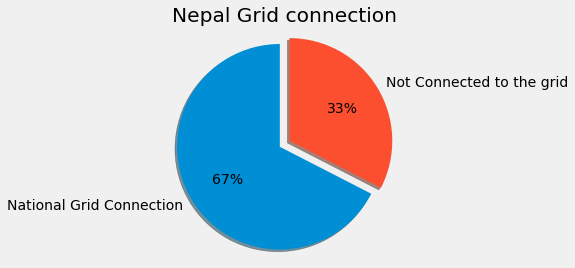

In [82]:
labels = "National Grid Connection",  "Not Connected to the grid"
explode = (0.1, 0.01) 
fig1, ax1 = plt.subplots()
ax1.pie(Perc_Grid_connection, explode=explode, labels=labels, autopct='%1.0f%%',shadow=True, startangle=90)
ax1.axis('equal')
#ax1.title("Nepal Grid connection ")
ax1.set_title("Nepal Grid connection")
plt.show()

### Analysis of Nepal  national grid connection 
From the mtf Nepal energy access, the report claims that 71.1% and 23% households are and not  connected to the national grid respectively. However by looking on the above pie chart from the raw data,  67% households are connected to the national grid, while 33% are not not connected to the  grid 

### Reasons households not connected to the grid 
C4. What is the main reason why your household is not connected to the grid? 
- 001 : Grid is too far from household/not available
- 002 : Cost of initial connection is too expensive
- 003: Monthly fee is too expensive
- 004: Satisfied with current energy solution 
- 005: Renting, Landlord decision
- 006: Service Unreliable
- 007: Administrative procedure is too complicated
- 008: Submitted application and waiting for connection
- 009: Company refused to connect the household
- 555: Other, specify



In [120]:
reason_no_grid_connection =  main_dataset["C4"]
type(reason_no_grid_connection)
# Converting the series into dataframe 
reason_no_grid_connection_df = reason_no_grid_connection.to_frame()
type(reason_no_grid_connection_df)

# Filling NaNs with Zero. This means that the information were not given 

reason_no_grid_connection_df.fillna(0).head(5)
#reason_no_grid_connection.value_counts()
#reason_no_grid_connection_df.value_counts() 
Perc_reason_no_grid_connection = (reason_no_grid_connection.value_counts(normalize = True)*100)
Perc_reason_no_grid_connection



1.0      69.687660
2.0       9.011777
7.0       8.653354
8.0       4.557092
4.0       3.942652
555.0     1.689708
6.0       1.280082
3.0       0.512033
9.0       0.409626
5.0       0.256016
Name: C4, dtype: float64

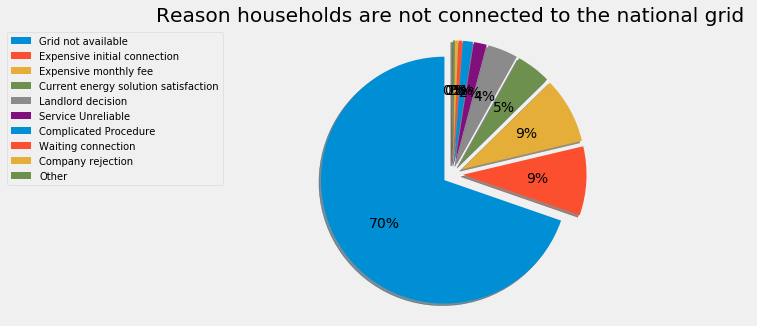

In [181]:
#Visualizing the reasons why households are not connected to the grid 

labels = "Grid not available","Expensive initial connection","Expensive monthly fee","Current energy solution satisfaction","Landlord decision","Service Unreliable","Complicated Procedure","Waiting connection","Company rejection","Other"

explode = (0.1, 0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1) 
fig1, ax1 = plt.subplots(figsize=(6,5))
patches, texts, auto = ax1.pie(Perc_reason_no_grid_connection, explode=explode, autopct='%1.0f%%',shadow=True, startangle=90,radius=1.2)

#patches, texts, auto = ax1.pie(Perc_reason_no_grid_connection, shadow=True, startangle=90,explode=explode, autopct='%1.1f%%' )
 
plt.legend(patches, labels,loc="left center",bbox_to_anchor=(-0.1, 1.),fontsize=10)
#ax1.title("Nepal Grid connection ")
ax1.axis('equal')
ax1.set_title("Reason households are not connected to the national grid ")
plt.show()


#ax = Perc_reason_no_grid_connection.plot.bar(rot= 30)


From the above pie chart, 70% households were not connected og the grid due to unavailability of grid. 

### Main source of electricity
data frame